In [ ]:
# Run this first (installs Transformers, Datasets, Accelerate, and evaluate)
!pip install -q transformers datasets accelerate evaluate
# Optional: install sentencepiece if you want certain tokenizers later
!pip install -q sentencepiece


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.4 MB/s eta 0:00:00


In [ ]:
# Step 2: Import the necessary libraries
from transformers import pipeline

# Load a pretrained sentiment analysis pipeline using BERT
# Use a model specifically trained for sentiment analysis if available for better results
classifier = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

# Test it on a few sample sentences
texts = [
    "I am feeling really happy today!",
    "This is the worst day of my life.",
    "I'm not sure how to feel about this."
]

# Run the classifier
results = classifier(texts)

# Show the outputs
for text, result in zip(texts, results):
    # Map labels to more descriptive terms
    label = "POSITIVE" if result['label'] == 'LABEL_1' else "NEGATIVE" if result['label'] == 'LABEL_0' else result['label']
    print(f"Text: {text}")
    print(f"Label: {label}, Confidence: {result['score']:.4f}")
    print()

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Text: I am feeling really happy today!
Label: POSITIVE, Confidence: 0.9999

Text: This is the worst day of my life.
Label: NEGATIVE, Confidence: 0.9998

Text: I'm not sure how to feel about this.
Label: NEGATIVE, Confidence: 0.9994



In [ ]:
# Test different types of sentences
test_cases = [
    "I absolutely love this!",
    "This is terrible and disappointing.",
    "The product is okay, nothing special.",
    "Best purchase I've ever made! 😊",
    "I'm feeling neutral about this."
]

print("="*60)
print("SENTIMENT ANALYSIS RESULTS")
print("="*60)

for text in test_cases:
    result = classifier(text)
    label = result[0]['label']
    score = result[0]['score']

    emoji = "✅" if label == "POSITIVE" else "❌"

    print(f"\n{emoji} Text: {text}")
    print(f"   Sentiment: {label}")
    print(f"   Confidence: {score:.2%}")
    print("-"*60)

SENTIMENT ANALYSIS RESULTS

✅ Text: I absolutely love this!
   Sentiment: POSITIVE
   Confidence: 99.99%
------------------------------------------------------------

❌ Text: This is terrible and disappointing.
   Sentiment: NEGATIVE
   Confidence: 99.98%
------------------------------------------------------------

❌ Text: The product is okay, nothing special.
   Sentiment: NEGATIVE
   Confidence: 98.59%
------------------------------------------------------------

✅ Text: Best purchase I've ever made! 😊
   Sentiment: POSITIVE
   Confidence: 99.97%
------------------------------------------------------------

❌ Text: I'm feeling neutral about this.
   Sentiment: NEGATIVE
   Confidence: 99.82%
------------------------------------------------------------


In [ ]:
from transformers import pipeline

# Load GoEmotions model (27 detailed emotions + neutral)
emotion_classifier = pipeline(
    "text-classification",
    model="SamLowe/roberta-base-go_emotions",
    top_k=None  # Return all emotion scores
)

# Emotion categories with emojis
emotion_map = {
    'admiration': '👏', 'amusement': '😄', 'anger': '😠', 'annoyance': '😒',
    'approval': '👍', 'caring': '🤗', 'confusion': '😕', 'curiosity': '🤔',
    'desire': '😍', 'disappointment': '😞', 'disapproval': '👎', 'disgust': '🤢',
    'embarrassment': '😳', 'excitement': '🎉', 'fear': '😨', 'gratitude': '🙏',
    'grief': '😭', 'joy': '😊', 'love': '❤️', 'nervousness': '😰',
    'optimism': '🌟', 'pride': '😌', 'realization': '💡', 'relief': '😮‍💨',
    'remorse': '😔', 'sadness': '😢', 'surprise': '😲', 'neutral': '😐'
}

test_texts = [
    "I'm so proud of my little sister for graduating!",
    "I can't stop crying, I feel so hopeless and empty.",
    "This is confusing, I don't understand what's happening.",
    "I'm grateful for all the support from my friends.",
    "I'm anxious about the presentation tomorrow.",
    "This movie was hilarious, I couldn't stop laughing!",
    "thats amazing dude."
]

print("="*70)
print("🎭 ADVANCED EMOTION DETECTION (27 Emotions)")
print("="*70)

for text in test_texts:
    results = emotion_classifier(text)[0]

    # Sort by score
    results_sorted = sorted(results, key=lambda x: x['score'], reverse=True)

    top_emotion = results_sorted[0]
    emoji = emotion_map.get(top_emotion['label'], '🎭')

    print(f"\n{emoji} Text: {text}")
    print(f"   Primary: {top_emotion['label'].upper()} ({top_emotion['score']:.1%})")

    # Show top 3 emotions
    print(f"   Top 3 Emotions:")
    for i, emotion in enumerate(results_sorted[:3], 1):
        e_emoji = emotion_map.get(emotion['label'], '•')
        bar = "█" * int(emotion['score'] * 30)
        print(f"      {i}. {e_emoji} {emotion['label']:15s}: {bar} {emotion['score']:.1%}")

    print("-"*70)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

RobertaForSequenceClassification LOAD REPORT from: SamLowe/roberta-base-go_emotions
Key                             | Status     |  | 
--------------------------------+------------+--+-
roberta.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

🎭 ADVANCED EMOTION DETECTION (27 Emotions)

👏 Text: I'm so proud of my little sister for graduating!
   Primary: ADMIRATION (43.0%)
   Top 3 Emotions:
      1. 👏 admiration     : ████████████ 43.0%
      2. 😌 pride          : ████████████ 40.4%
      3. 😊 joy            : ████ 14.9%
----------------------------------------------------------------------

😢 Text: I can't stop crying, I feel so hopeless and empty.
   Primary: SADNESS (89.3%)
   Top 3 Emotions:
      1. 😢 sadness        : ██████████████████████████ 89.3%
      2. 😞 disappointment : ████ 13.4%
      3. 😐 neutral        :  2.3%
----------------------------------------------------------------------

😕 Text: This is confusing, I don't understand what's happening.
   Primary: CONFUSION (94.7%)
   Top 3 Emotions:
      1. 😕 confusion      : ████████████████████████████ 94.7%
      2. 🤔 curiosity      : █ 5.1%
      3. 😐 neutral        : █ 4.1%
----------------------------------------------------------------------

🙏 Text: I'm gr

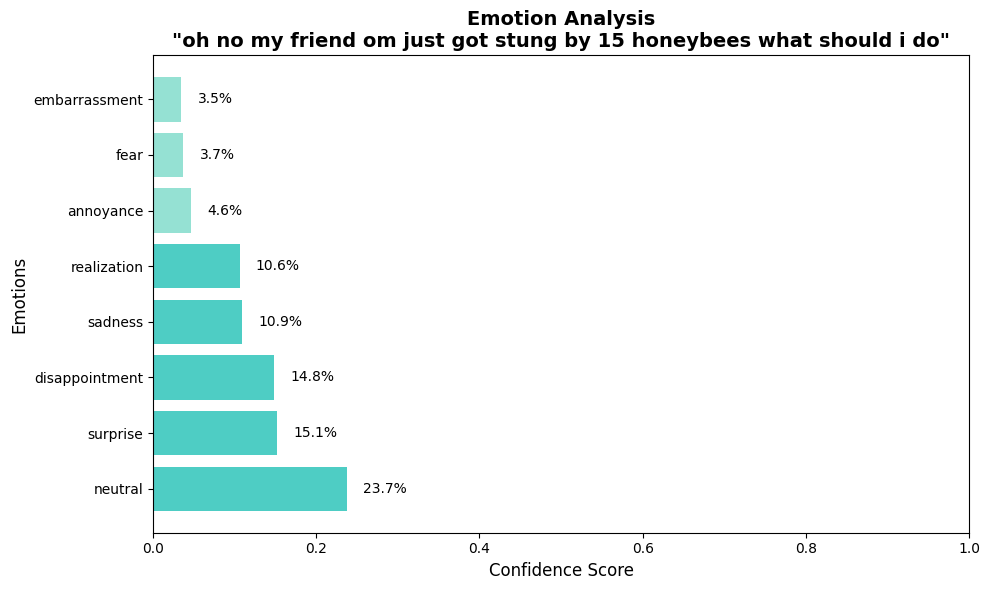

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_emotions(text, top_n=8):
    """Visualize top emotions as a bar chart"""
    results = emotion_classifier(text)[0]
    results_sorted = sorted(results, key=lambda x: x['score'], reverse=True)[:top_n]

    emotions = [r['label'] for r in results_sorted]
    scores = [r['score'] for r in results_sorted]

    # Color coding
    colors = ['#ff6b6b' if s > 0.3 else '#4ecdc4' if s > 0.1 else '#95e1d3'
              for s in scores]

    plt.figure(figsize=(10, 6))
    bars = plt.barh(emotions, scores, color=colors)

    plt.xlabel('Confidence Score', fontsize=12)
    plt.ylabel('Emotions', fontsize=12)
    plt.title(f'Emotion Analysis\n"{text}"', fontsize=14, fontweight='bold')
    plt.xlim(0, 1.0)

    # Add percentage labels
    for i, (emotion, score) in enumerate(zip(emotions, scores)):
        plt.text(score + 0.02, i, f'{score:.1%}', va='center')

    plt.tight_layout()
    plt.show()

# Test it
test_text = "oh no my friend om just got stung by 15 honeybees what should i do"
visualize_emotions(test_text)

In [ ]:
import pandas as pd
from datetime import datetime

def analyze_and_save(texts, filename="emotion_results.csv"):
    """Analyze multiple texts and save to CSV"""

    all_results = []

    for text in texts:
        results = emotion_classifier(text)[0]
        results_sorted = sorted(results, key=lambda x: x['score'], reverse=True)

        top_emotion = results_sorted[0]
        second_emotion = results_sorted[1]

        all_results.append({
            'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
            'text': text,
            'primary_emotion': top_emotion['label'],
            'primary_score': top_emotion['score'],
            'secondary_emotion': second_emotion['label'],
            'secondary_score': second_emotion['score']
        })

    df = pd.DataFrame(all_results)
    df.to_csv(filename, index=False)
    print(f"✅ Results saved to {filename}")
    return df

# Use it
my_texts = [
    "I'm so excited about this project!",
    "I'm worried about the deadline.",
    "This is confusing me a lot.",
    "I'm grateful for your help!",
]

df = analyze_and_save(my_texts)
print("\n📊 Preview:")
print(df)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


✅ Results saved to emotion_results.csv

📊 Preview:
             timestamp                                text primary_emotion  \
0  2026-02-20 10:57:33  I'm so excited about this project!      excitement   
1  2026-02-20 10:57:33     I'm worried about the deadline.     nervousness   
2  2026-02-20 10:57:33         This is confusing me a lot.       confusion   
3  2026-02-20 10:57:33         I'm grateful for your help!       gratitude   

   primary_score secondary_emotion  secondary_score  
0       0.824793               joy         0.043475  
1       0.564363              fear         0.244415  
2       0.936346           neutral         0.061116  
3       0.989125        admiration         0.066626  


In [ ]:
def batch_emotion_analyzer(texts):
    """Analyze multiple texts and show summary statistics"""

    emotion_counts = {}

    print("="*70)
    print("📊 BATCH EMOTION ANALYSIS")
    print("="*70)

    for i, text in enumerate(texts, 1):
        results = emotion_classifier(text)[0]
        results_sorted = sorted(results, key=lambda x: x['score'], reverse=True)
        top = results_sorted[0]

        # Count emotions
        emotion_counts[top['label']] = emotion_counts.get(top['label'], 0) + 1

        print(f"\n{i}. Text: {text[:60]}...")
        print(f"   Emotion: {top['label'].upper()} ({top['score']:.1%})")

    # Summary
    print("\n" + "="*70)
    print("📈 EMOTION DISTRIBUTION SUMMARY")
    print("="*70)

    sorted_emotions = sorted(emotion_counts.items(), key=lambda x: x[1], reverse=True)

    for emotion, count in sorted_emotions:
        percentage = (count / len(texts)) * 100
        bar = "█" * int(percentage / 2)
        print(f"{emotion:15s}: {bar} {count} ({percentage:.1f}%)")

    return emotion_counts

# Test with sample data
sample_texts = [
    "I love this so much!",
    "This is making me angry.",
    "I'm scared about the future.",
    "I feel so sad today.",
    "I'm confused about what to do.",
    "This is amazing! I'm so happy!",
    "I'm worried this won't work.",
    "I appreciate your help so much!"
]

batch_emotion_analyzer(sample_texts)

📊 BATCH EMOTION ANALYSIS

1. Text: I love this so much!...
   Emotion: LOVE (95.4%)

2. Text: This is making me angry....
   Emotion: ANGER (83.2%)

3. Text: I'm scared about the future....
   Emotion: FEAR (89.1%)

4. Text: I feel so sad today....
   Emotion: SADNESS (90.7%)

5. Text: I'm confused about what to do....
   Emotion: CONFUSION (94.0%)

6. Text: This is amazing! I'm so happy!...
   Emotion: JOY (76.0%)

7. Text: I'm worried this won't work....
   Emotion: NERVOUSNESS (53.3%)

8. Text: I appreciate your help so much!...
   Emotion: ADMIRATION (92.1%)

📈 EMOTION DISTRIBUTION SUMMARY
love           : ██████ 1 (12.5%)
anger          : ██████ 1 (12.5%)
fear           : ██████ 1 (12.5%)
sadness        : ██████ 1 (12.5%)
confusion      : ██████ 1 (12.5%)
joy            : ██████ 1 (12.5%)
nervousness    : ██████ 1 (12.5%)
admiration     : ██████ 1 (12.5%)


{'love': 1,
 'anger': 1,
 'fear': 1,
 'sadness': 1,
 'confusion': 1,
 'joy': 1,
 'nervousness': 1,
 'admiration': 1}

In [ ]:
!pip install deepface
from deepface import DeepFace

26-02-20 10:55:46 - Directory /root/.deepface has been created
26-02-20 10:55:46 - Directory /root/.deepface/weights has been created


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WhatsApp Image 2026-01-23 at 5.54.35 PM (1).jpg to WhatsApp Image 2026-01-23 at 5.54.35 PM (1).jpg


In [ ]:
from deepface import DeepFace

result = DeepFace.analyze(img_path = "WhatsApp Image 2026-01-23 at 5.54.35 PM (1).jpg", actions=['emotion'])
print(result[0]['emotion'])

26-02-20 11:01:26 - 🔗 facial_expression_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5 to /root/.deepface/weights/facial_expression_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 182MB/s]


{'angry': np.float32(0.38864797), 'disgust': np.float32(0.00066990836), 'fear': np.float32(6.836214), 'happy': np.float32(3.8070276), 'sad': np.float32(3.3525734), 'surprise': np.float32(0.033332076), 'neutral': np.float32(85.581535)}


In [ ]:
from deepface import DeepFace
import numpy as np

def get_bert_probs(text):
    results = emotion_classifier(text)[0]
    # Convert to dictionary {emotion: score}
    return {r['label']: r['score'] for r in results}

def get_deepface_probs(img_path):
    result = DeepFace.analyze(img_path=img_path, actions=['emotion'])
    probs = result[0]['emotion']
    # Normalize to 0-1 (DeepFace returns percentages)
    total = sum(probs.values())
    return {k: v/total for k, v in probs.items()}

def late_fusion(text, img_path, bert_weight=0.6, deepface_weight=0.4):
    bert_probs = get_bert_probs(text)
    deepface_probs = get_deepface_probs(img_path)

    # Common emotions between both models
    common_emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

    # Map BERT emotion names to DeepFace names
    bert_map = {
        'anger': 'angry', 'joy': 'happy', 'sadness': 'sad',
        'fear': 'fear', 'disgust': 'disgust', 'surprise': 'surprise', 'neutral': 'neutral'
    }

    fused = {}
    for deepface_label in common_emotions:
        bert_label = [k for k, v in bert_map.items() if v == deepface_label][0]
        bert_score = bert_probs.get(bert_label, 0)
        deepface_score = deepface_probs.get(deepface_label, 0)
        fused[deepface_label] = (bert_weight * bert_score) + (deepface_weight * deepface_score)

    final_emotion = max(fused, key=fused.get)
    return final_emotion, fused

# Test it
text = "i have nothing to say man  "
img_path = "WhatsApp Image 2026-01-23 at 5.54.35 PM (1).jpg"

final_emotion, scores = late_fusion(text, img_path)
print(f"Final Fused Emotion: {final_emotion.upper()}")
print(f"Scores: {scores}")

Final Fused Emotion: NEUTRAL
Scores: {'angry': np.float32(0.027833058), 'disgust': np.float32(0.0031042302), 'fear': np.float32(0.027724227), 'happy': np.float32(0.015664311), 'sad': np.float32(0.015032716), 'surprise': np.float32(0.000508907), 'neutral': np.float32(0.64829576)}


In [ ]:
final_emotion, scores = late_fusion(text, img_path)
print(f"Final Fused Emotion: {final_emotion.upper()}")
print("\nScores:")
for emotion, score in sorted(scores.items(), key=lambda x: x[1], reverse=True):
    bar = "█" * int(score * 100)
    print(f"  {emotion:10s}: {bar} {score*100:.1f}%")

Final Fused Emotion: NEUTRAL

Scores:
  neutral   : ████████████████████████████████████████████████████████████████ 64.8%
  angry     : ██ 2.8%
  fear      : ██ 2.8%
  happy     : █ 1.6%
  sad       : █ 1.5%
  disgust   :  0.3%
  surprise  :  0.1%
